In [223]:
import tensorflow as tf
import pandas as pd
from keras.models import load_model
import numpy as np
from matplotlib import pyplot as plt
import random


### Load Dataset

In [237]:
def load_dataset(path_train = 'train.csv', path_test = 'test.csv'):
    '''
        Loads data as pandas' dataframe
    '''
    train = pd.read_csv(path_train)
    test = pd.read_csv(path_test)
    return train.iloc[:,:-1], train['Y'] ,test.iloc[:,:-1], test['Y'] 

In [11]:
X_train, y_train, X_test, y_test = load_dataset() 

### Define Neural Network

In [238]:
class NeuralNetwork():
    '''
        Define The Neural Network and its parameters
    
    '''
    def __init__(self, epochs = 30, learning_rate=0.1, activation_fnc='relu', verbose=1):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.activation_fnc = activation_fnc
        self.verbose = verbose
        
    def model(self,list_of_neurons):
        model = tf.keras.models.Sequential()
        for no_of_neurons in range(len(list_of_neurons)-1):
            model.add(tf.keras.layers.Dense(no_of_neurons, activation=self.activation_fnc))
        model.add(tf.keras.layers.Dense(10, activation="softmax"))
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        model.compile(loss="sparse_categorical_crossentropy",optimizer=opt ,metrics=["accuracy"])
        history  = model.fit(X_train,y_train, epochs=self.epochs, verbose=self.verbose)
        plt.plot(history.history['accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train'], loc='upper left')
        plt.show()
        return model

### Define Ensemble Model

In [239]:
class ensemble():
    '''
        Creates an ensemble of multiple ANNs for a 10-Label classifier
    '''
    def __init__(self):
        self.models = []
        
    def build_ensemble(self,no_of_model):

        neuron = [300,100,10]
        for n in range(no_of_model):
            epochs = random.randint(1,10)
            lr = random.randint(1,10)/10
            print(epochs, lr)
            NN = NeuralNetwork(epochs= epochs, learning_rate=lr)
            model = NN.model(neuron)
            self.models.append(model)
        
        return self.models

    def evaluate(self):
        
        for model in self.models:
            _, acc = model.evaluate(X_test, y_test, verbose=0)
            print('Model Accuracy: %.3f' % acc)
    
    def predict(self):
        count = 0
        res = np.zeros([10000,10])  # Defines by data size
        for model in self.models:
            res = np.add(res, model.predict(X_test))
        return res/len(self.models)

In [233]:
Ensemble = ensemble()

6 0.6
Epoch 1/6
938/938 [==============================] - 0s 317us/step - loss: 2.3698 - accuracy: 0.1003
Epoch 2/6
938/938 [==============================] - 0s 318us/step - loss: 2.3677 - accuracy: 0.1001
Epoch 3/6
938/938 [==============================] - 0s 318us/step - loss: 2.3698 - accuracy: 0.1029
Epoch 4/6
938/938 [==============================] - 0s 322us/step - loss: 2.3696 - accuracy: 0.1025
Epoch 5/6
938/938 [==============================] - 0s 319us/step - loss: 2.3686 - accuracy: 0.1001
Epoch 6/6
938/938 [==============================] - 0s 318us/step - loss: 2.3734 - accuracy: 0.0999


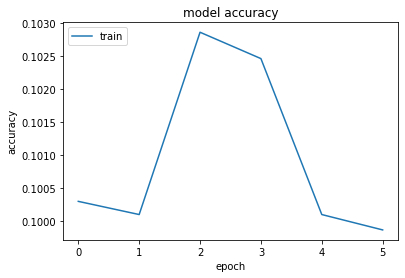

4 0.1
Epoch 1/4
938/938 [==============================] - 0s 325us/step - loss: 2.3140 - accuracy: 0.1037
Epoch 2/4
938/938 [==============================] - 0s 325us/step - loss: 2.3131 - accuracy: 0.1032
Epoch 3/4
938/938 [==============================] - 0s 329us/step - loss: 2.3135 - accuracy: 0.1023
Epoch 4/4
938/938 [==============================] - 0s 327us/step - loss: 2.3147 - accuracy: 0.1045


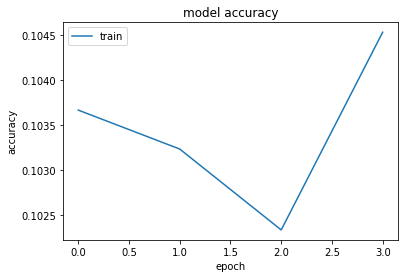

1 1.0
938/938 [==============================] - 0s 330us/step - loss: 2.4095 - accuracy: 0.1017


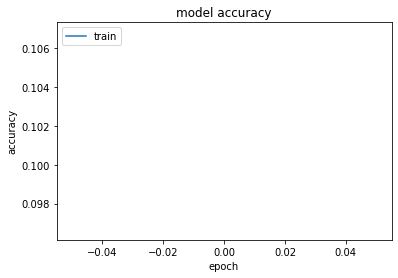

6 0.8
Epoch 1/6
938/938 [==============================] - 0s 327us/step - loss: 2.3886 - accuracy: 0.1012
Epoch 2/6
938/938 [==============================] - 0s 327us/step - loss: 2.3864 - accuracy: 0.0980
Epoch 3/6
938/938 [==============================] - 0s 325us/step - loss: 2.3951 - accuracy: 0.1014
Epoch 4/6
938/938 [==============================] - 0s 324us/step - loss: 2.3940 - accuracy: 0.1028
Epoch 5/6
938/938 [==============================] - 0s 326us/step - loss: 2.3848 - accuracy: 0.1020
Epoch 6/6
938/938 [==============================] - 0s 326us/step - loss: 2.3914 - accuracy: 0.1014


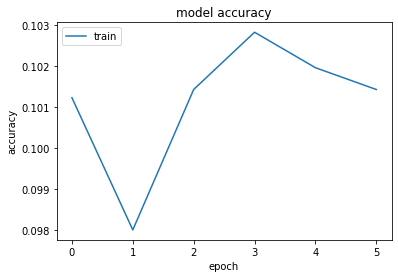

4 0.6
Epoch 1/4
938/938 [==============================] - 0s 319us/step - loss: 2.3754 - accuracy: 0.0991
Epoch 2/4
938/938 [==============================] - 0s 321us/step - loss: 2.3686 - accuracy: 0.1004
Epoch 3/4
938/938 [==============================] - 0s 320us/step - loss: 2.3669 - accuracy: 0.1007
Epoch 4/4
938/938 [==============================] - 0s 320us/step - loss: 2.3779 - accuracy: 0.1008


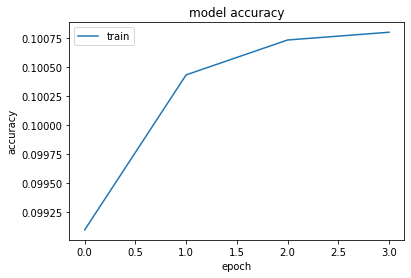

In [234]:
Ensemble.build_ensemble(5)

In [235]:
Ensemble.evaluate()

Model Accuracy: 0.100
Model Accuracy: 0.096
Model Accuracy: 0.098
Model Accuracy: 0.098
Model Accuracy: 0.098


In [236]:
Ensemble.predict()

array([[0.11308338, 0.09151922, 0.09706227, ..., 0.08306692, 0.09549307,
        0.08832838],
       [0.11308338, 0.09151922, 0.09706227, ..., 0.08306692, 0.09549307,
        0.08832838],
       [0.11308338, 0.09151922, 0.09706227, ..., 0.08306692, 0.09549307,
        0.08832838],
       ...,
       [0.11308338, 0.09151922, 0.09706227, ..., 0.08306692, 0.09549307,
        0.08832838],
       [0.11308338, 0.09151922, 0.09706227, ..., 0.08306692, 0.09549307,
        0.08832838],
       [0.11308338, 0.09151922, 0.09706227, ..., 0.08306692, 0.09549307,
        0.08832838]])